<a target="_blank" href="https://colab.research.google.com/github/PaulLerner/aivancity_nlp/blob/main/pw2_transformers.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Installation and imports

Hit `Ctrl+S` to save a copy of the Colab notebook to your drive

Run on Google Colab GPU:
- Connect
- Modify execution
- GPU

![image.png](https://paullerner.github.io/aivancity_nlp/_static/colab_gpu.png)

In [ ]:
%pip install transformers datasets

In [6]:
import torch
import torch.nn as nn
from torch.nn import functional as F


In [2]:
assert torch.cuda.is_available(), "Connect to GPU and try again (ask teacher for help)"

# Attention

Attention is a crucial component in the transformer, it allows to capture dependencies between different positions of two sequence of elements. In our case, and in most cases in NLP applications, sequences are sentences and elements are (sub)words.
It is a powerful operation that allows to learn an alignment between each element in two sequences. It generates a score of how related each element in sequence1 and sequence2 are between each other.
Understanding how attention works and being able to implement it are essential for anyone working with transformers. 

Given a query ($Q$), key ($K$), and value ($V$) tensors, the attention mechanism computes a weighted sum of the value tensor based on the similarity between the query and key tensors as shown in the following equation:

$$
\text{Attention}(Q,K,V) = \text{softmax}\Big(\frac{QK^T}{\sqrt{d_k}}\Big)V
$$

where 
- $Q$ represents the query tensor.
- $K$ represents the key tensor.
- $V$ represents the value tensor.
- $d_k$ represents the dimensionality of the key tensor.

This is the image that was in the original Transformer paper and that shows the computations used in the attention.

Forget about the right part, we'll get back to that later in the lab.

![image](https://miro.medium.com/v2/resize:fit:1270/1*LpDpZojgoKTPBBt8wdC4nQ.png)


In this exercise, we will dive into the attention mechanism. To do so, we are going to build a simple cross-attention function that we will then extend to a more complex multi-head self-attention module that incorporates the concept of causality.

## Building a Simple Cross-Attention Function

Cross-attention refers to the case where the input sequences to compute $Q$, $K$, and $V$ come from different sources. It allows models to incorporate contextual information from one sequence (S1) into another (S2). <a name="cite_ref-1"></a>[<sup>[1]</sup>](#cite_note-1)


Given two input sequences $S_1$ and $S_2$ and the transformation weights $W_Q$, $W_K$ and $W_V$, complete the `cross_attention` function in the cell below. 

You need to implement the following:
- Calculate the query, key, and value projections using linear transformations.
- Compute the attention scores by performing the dot product between the query and key tensors.
- Apply softmax activation to the attention scores to obtain the attention weights.
- Multiply the attention weights with the value tensor to get the attended values.
- Return the attended values.

<a name="cite_note-1"></a>1. [^](#cite_ref-1) Conceptually, the self attention variant that you might have heard is the same, with the only difference that the S1 and S2 sequences are the same.

Hint: Matrix sizes

- q: query size
- d: hidden dimension
- c: context length


- Q: 1xqxd
- K, V: 1xcxd
- Q x K:  1xqxd x 1xsxd.T 
- (QK) x V:  1xqxs  x  V  1xsxd

  
- Attn: 1xqxd

In [1]:

def cross_attention(S1, S2, W_Q, W_K, W_V):
    pass

In [4]:
# Source
S1 = torch.rand((1,13,3))

# Query
S2 = torch.rand((1,4,3))

# Projections
W_Q = torch.rand((3, 2))  # Query weights
W_K = torch.rand((3, 2))  # Key weights
W_V = torch.rand((3, 2))  # Value weights

# Perform cross-attention
attended_values = cross_attention(S1, S2, W_Q, W_K, W_V)

# Expected output # 1,4,2 (B, Sequence, Projection)
print(f"Output Shape: {attended_values.shape}")

Output Shape: torch.Size([1, 4, 2])


## Extending to Multi-Head Self-Attention

### Self-Attention

We will be replacing the cross-attention mechanism with self-attention. In self-attention, a single sequence acts as the query, key, and value, allowing attention to be computed within the sequence itself. This can be useful for syntactic where an attention head can model the relationship between part of speech like subjects and verbs. 

In [2]:
def self_attention(S, W_Q, W_K, W_V):
    pass

In [6]:
# Sequence
S = torch.rand((1,13,3))

# Projections
W_Q = torch.rand((3, 2))  # Query weights
W_K = torch.rand((3, 2))  # Key weights
W_V = torch.rand((3, 2))  # Value weights

# Perform self-attention
attended_values = self_attention(S, W_Q, W_K, W_V)

# Expected output # 1,13, 2 (B, Sequence, Projection)
print(f"Output Shape: {attended_values.shape}")

Output Shape: torch.Size([1, 13, 2])


### Multi-Head

However, the relations present even in a single sentence are more than one. Think about number and gender agreement as one, the semantic relation between subject and object, the functional aspect that verb arguments have etc. All this cannot be modeled by a single head.

For this reason, we are going to extend the single-head attention function to **multi-head attention**. In the previous implementation, we had one set of weights for the input query, resulting in a single type of _relationship between the the source and target sequence_. With multi-head attention, we can utilize _multiple parallel single-head attention modules_ to obtain diverse relationships between the query and the values. The attention operation works by projecting the sequences through a multiplication with a projection matrix, and then computing the alignment score. These are are all operation that can be parallelized since there's no interdependency between each each head. For this reasons, each head could learn to model a different linguistic intereation useful for many downstream tasks, be it syntactic, semantic or generation-based..


As we've seen in class, this can be done simply by reshaping queries, keys and values.

Project back the results using $W_O$

In [3]:
def multi_head_attention(S, W_Q, W_K, W_V, W_O, num_heads=4):    
    return output

In [13]:
# Sequence
S = torch.rand((1,13,8))

# Projections
W_Q = torch.rand((8, 8))  # Query weights
W_K = torch.rand((8, 8))  # Key weights
W_V = torch.rand((8, 8))  # Value weights
W_O = torch.rand((8, 8))  # Output proj

# Perform self-attention
attended_values = multi_head_attention(S, W_Q, W_K, W_V, W_O)

# Expected output # 1, 13, 8 (B, Sequence, Projection)
print(f"Output Shape: {attended_values.shape}")

Output Shape: torch.Size([1, 13, 8])


### Causal Mask

GPT uses a version of self-attention called causal self-attention. When training our models for tasks like language modeling and machine translation, in practice we feed the entire train sequence to the model but, at every timestep, we want to prevent it to compute the alignment with future tokens. For this reason we use a mask that we incrementally lift at every timestep. For instance, we have a sentence that says "Libson is a great city to live in". At time 0, we feed the entire sentence to the model masking everything but the first token. Using the strikethrough format as masking, this will be what the model sees at step 0:

- Time 0: Libson ~is a great city to live in~

We then let the model generate a token a and move to step 1 where we are masking everything but the first two tokens
 
- Time 1: Libson is ~a great city to live in~ 

and so on...

- Time 2: Libson is a ~great city to live in~ 
- Time 3: Libson is a great ~city to live in~ 
- Time 4: Libson is a great city ~to live in~ 
- Time 5: Libson is a great city to ~live in~ 
- Time 6: Libson is a great city to live ~in~ 


![transformer](https://paullerner.github.io/aivancity_nlp/_static/attention_mask.png)

Apply mask on attention using `torch.tril` and `masked_fill`

In [4]:
def causal_multi_head_attention(S, W_Q, W_K, W_V, W_O, num_heads=4):    
    return output

In [16]:
# Sequence
S = torch.rand((1,3,8))

# Projections
W_Q = torch.rand((8, 8))  # Query weights
W_K = torch.rand((8, 8))  # Key weights
W_V = torch.rand((8, 8))  # Value weights
W_O = torch.rand((8, 8))  # Output proj

# Perform self-attention
attended_values = causal_multi_head_attention(S, W_Q, W_K, W_V, W_O)

# Expected output # 1, 3, 8 (B, Sequence, Projection)
print(f"Output Shape: {attended_values.shape}")

bidirectional attention:
tensor([[[[ 7.6750,  9.8763,  7.8718],
          [11.7096, 14.9262, 11.9657],
          [ 8.8149, 11.3644,  9.0476]],

         [[ 6.9848,  8.4330,  6.1530],
          [ 8.9807, 10.8143,  7.9368],
          [ 7.9229,  9.5573,  6.9868]],

         [[ 8.4009, 10.4845,  9.2640],
          [10.3813, 12.9258, 11.4504],
          [ 8.6193, 10.7093,  9.5088]],

         [[ 9.4824, 11.5997, 10.2568],
          [13.4200, 16.4683, 14.5326],
          [10.5152, 12.8738, 11.3774]]]])

causal attention:
tensor([[[[ 7.6750,    -inf,    -inf],
          [11.7096, 14.9262,    -inf],
          [ 8.8149, 11.3644,  9.0476]],

         [[ 6.9848,    -inf,    -inf],
          [ 8.9807, 10.8143,    -inf],
          [ 7.9229,  9.5573,  6.9868]],

         [[ 8.4009,    -inf,    -inf],
          [10.3813, 12.9258,    -inf],
          [ 8.6193, 10.7093,  9.5088]],

         [[ 9.4824,    -inf,    -inf],
          [13.4200, 16.4683,    -inf],
          [10.5152, 12.8738, 11.3774]]]])
Ou


We can now look back at the attention figure from the paper. Hopefully, you are now able to understand also the right side of the figure.

![image](https://miro.medium.com/v2/resize:fit:1270/1*LpDpZojgoKTPBBt8wdC4nQ.png)

### Pytorch Module

The last modification involves embedding our function into a PyTorch module. As you may have noticed, in the previous exercise, we passed the transformation weights as inputs to the function. In a real-world scenario, these matrices are learned, and PyTorch can keep track of them for us.

- Complete the missing lines on the initialization of the module and the forward pass.
- add dropout on the attention weights and the output


In [7]:
class CausalSelfAttention(nn.Module):
    def __init__(self, hidden_size=8, num_heads=2, dropout=0.1, seq_len=3):
        super().__init__()

    def forward(self, x):
        return output

In [ ]:
attention_module = CausalSelfAttention()

In [100]:
# Sequence
S = torch.rand((1,3,8))

# Perform self-attention
attended_values = attention_module(S)

# Expected output # 1, 3, 8 (B, Sequence, Projection)
print(f"Output Shape: {attended_values.shape}")

Output Shape: torch.Size([1, 3, 8])


# Transformer


![transformer](https://paullerner.github.io/aivancity_nlp/_static/transformer_decoder.png)

## Attention is almost all you need: feedforward neural network

Simple Neural network of two layers with a ReLU activation in-between and dropout at output. The intermediate dimension should be 4 times `hidden_size`

In [9]:
class FeedForward(nn.Module):
    def __init__(self, hidden_size, dropout):
        super().__init__()

    def forward(self, x):
        pass

## Transformer Block

- stack CausalSelfAttention and FeedForward
- add residual connections
- add layer norms

In [10]:
class Block(nn.Module):
    def __init__(self, hidden_size=8, num_heads=2, dropout=0.1, seq_len=3):
        super().__init__()

    def forward(self, x):
        pass

In [ ]:
# Sequence
S = torch.rand((1,3,8))

block = Block()
# Perform self-attention
output = block(S)

# Expected output # 1, 3, 8 (B, Sequence, Projection)
print(f"Output Shape: {output.shape}")

## Complete Transformer
- word embeddings
- position embeddings
- as many blocks as you like to stack
- output layer back to the vocabulary (no need for softmax)

In [11]:
class Transformer(nn.Module):

    def __init__(self, vocab_size=100, hidden_size=8, num_heads=2, dropout=0.1, seq_len=3, num_layers=2):
        super().__init__()        
            
    def forward(self, input_ids):
        return logits


In [ ]:
transformer = Transformer()

In [71]:
input_ids = torch.randint(0,100,(1, 3))

In [72]:
input_ids

tensor([[85, 10,  4]])

In [73]:
logits = transformer(input_ids)

In [74]:
# scores (not probabilities because not normalized) over the complete vocabulary, for each token in the sentence
# shape: batch size, seq_len, V
logits.shape

torch.Size([1, 3, 100])

# Training

A peak into Language Modeling (next class)


![lm](https://paullerner.github.io/aivancity_nlp/_static/lm.png)

A language model estimates the probability of a sequence of words $w$:
$$P(w)=\prod_t^{|w|} P(w_t | w_{<t}) = P(w_1)  P(w_2|w_1)  P(w_3 | w_1 w_2)...$$

See how this turns into a sequence of classification problem:
- first $P(w_1)$
- then $P(w_2|w_1)$
- etc.

The model "predicts the next word" given a context

## data

In [7]:
from datasets import load_dataset, DatasetDict

texts = load_dataset('wikitext', 'wikitext-103-raw-v1')['train'].shuffle(seed=1111).select(range(10000))["text"]
len(texts)

/home/paul/anaconda3/envs/matos/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


10000

In [8]:
texts[0]

" Following the death of Finan , bishop of Lindisfarne , Alhfrith of Deira , in collusion with Wilfred of York , Agilbert of Wessex and others , were determined to persuade Oswiu to rule in favour of the Roman rite of Christianity within the kingdoms over which he had imperium . The case was debated in Oswiu 's presence at the Synod of Whitby in 664 , with Colmán , Hild and Cedd defending the Celtic rite and the tradition inherited from Aidan , and Wilifred speaking for the Roman position . The Roman cause prevailed and the former division of ecclesiastical authorities was set aside . Those who could not accept it , including Colmán , departed elsewhere . \n"

## tokenization

We almost did not talk about tokenization yet! We've assumed words, which is impractical given finite vocabulary size.

Instead, LLMs rely on BPE, a data compression technique, which segments rare words into subwords

In [8]:
from transformers import AutoTokenizer

In [9]:
tokenizer = AutoTokenizer.from_pretrained("openai-community/gpt2")

tokenizer.pad_token = tokenizer.eos_token

seq_len=128

/home/paul/anaconda3/envs/matos/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [11]:
print(tokenizer.tokenize(texts[0]))

['ĠFollowing', 'Ġthe', 'Ġdeath', 'Ġof', 'ĠFin', 'an', 'Ġ,', 'Ġbishop', 'Ġof', 'ĠLind', 'isf', 'ar', 'ne', 'Ġ,', 'ĠAl', 'h', 'fr', 'ith', 'Ġof', 'ĠDe', 'ira', 'Ġ,', 'Ġin', 'Ġcollusion', 'Ġwith', 'ĠWil', 'fred', 'Ġof', 'ĠYork', 'Ġ,', 'ĠAg', 'il', 'bert', 'Ġof', 'ĠWes', 'sex', 'Ġand', 'Ġothers', 'Ġ,', 'Ġwere', 'Ġdetermined', 'Ġto', 'Ġpersuade', 'ĠOsw', 'iu', 'Ġto', 'Ġrule', 'Ġin', 'Ġfavour', 'Ġof', 'Ġthe', 'ĠRoman', 'Ġrite', 'Ġof', 'ĠChristianity', 'Ġwithin', 'Ġthe', 'Ġkingdoms', 'Ġover', 'Ġwhich', 'Ġhe', 'Ġhad', 'Ġimper', 'ium', 'Ġ.', 'ĠThe', 'Ġcase', 'Ġwas', 'Ġdebated', 'Ġin', 'ĠOsw', 'iu', "Ġ'", 's', 'Ġpresence', 'Ġat', 'Ġthe', 'ĠSyn', 'od', 'Ġof', 'ĠWhit', 'by', 'Ġin', 'Ġ6', '64', 'Ġ,', 'Ġwith', 'ĠCol', 'm', 'Ã¡n', 'Ġ,', 'ĠH', 'ild', 'Ġand', 'ĠC', 'edd', 'Ġdefending', 'Ġthe', 'ĠCeltic', 'Ġrite', 'Ġand', 'Ġthe', 'Ġtradition', 'Ġinherited', 'Ġfrom', 'ĠAid', 'an', 'Ġ,', 'Ġand', 'ĠWil', 'if', 'red', 'Ġspeaking', 'Ġfor', 'Ġthe', 'ĠRoman', 'Ġposition', 'Ġ.', 'ĠThe', 'ĠRoman', 'Ġcause', 'Ġpr

In [22]:
text_batch = texts[:3]

huggingface's `transformers` provides a convenient way to tokenize text, it also takes care of padding the text so that we can wrap all examples of a batch in the same `Tensor`

In [25]:
input_ids = tokenizer(text_batch, return_tensors='pt', padding=True, truncation=True, max_length=seq_len)['input_ids']

In [26]:
input_ids

tensor([[14207,   262,  1918,   286,  4463,   272,   837, 24233,   286,  9329,
          4468,   283,   710,   837,   978,    71,  8310,   342,   286,  1024,
          8704,   837,   287, 29771,   351,  5187, 39193,   286,  1971,   837,
          2449,   346,  4835,   286, 18622,  8044,   290,  1854,   837,   547,
          5295,   284, 20999, 30317, 16115,   284,  3896,   287,  7075,   286,
           262,  7993, 46048,   286, 13624,  1626,   262, 41901,   625,   543,
           339,   550, 11071,  1505,   764,   383,  1339,   373, 24594,   287,
         30317, 16115,   705,    82,  4931,   379,   262, 16065,   375,   286,
         13183,  1525,   287,   718,  2414,   837,   351,  1623,    76, 21162,
           837,   367,   688,   290,   327,  6048, 11749,   262, 27986, 46048,
           290,   262,  6761, 19552,   422, 22225,   272,   837,   290,  5187,
           361,   445,  5486,   329,   262,  7993,  2292,   764,   383,  7993,
          2728, 34429,   290,   262,  1966,  7297,  

In [27]:
input_ids.shape

torch.Size([3, 128])

Notice the padding: small texts are padded by `tokenizer.eos_token_id`

In [13]:
tokenizer.eos_token_id

50256

In [29]:
transformer = Transformer(vocab_size=tokenizer.vocab_size, seq_len=seq_len)

In [30]:
# same as before (only larger seq_len and V)
logits = transformer(input_ids)
logits.shape

torch.Size([3, 128, 50257])

## Self-supervision

Remember the greatest thing about Language Modeling: we don't need to annotate data!

The model should predict the next word given the context so we just need to shift the input by 1 to get the labels!

Compute the loss on one batch using `nn.CrossEntropyLoss`. Be careful about the padding! We don't want our model to learn to predict padding at the end of text!

Like in the previous Practical Work, remember to flatten the batch dimension with the sequence dimension

In [32]:
# loss of randomly initialized model

tensor(11.0828, grad_fn=<NllLossBackward0>)

Notice anything about this value? What about its exponentiate? Ever heard of perplexity? More about this in the next class

## Training loop

Ensure that everything is on GPU by calling `.cuda()` or passing `device="cuda"` on init

In [ ]:
transformer = Transformer(vocab_size=tokenizer.vocab_size, hidden_size=128, num_layers=6, num_heads=4, dropout=0.1, seq_len=seq_len).cuda()

optimizer = torch.optim.AdamW(transformer.parameters(), lr=0.0001)

batch_size = 32
# in the interest of time, we simply overfit on a single batch
# try to train on the complete texts when you have more time
loader = torch.utils.data.DataLoader(texts[:batch_size], batch_size=batch_size, shuffle=True, drop_last=True)

losses = []
step = 0
for epoch in range(1000):
    for text_batch in loader:
        input_ids = tokenizer(text_batch, return_tensors='pt', padding=True, truncation=True, max_length=seq_len)['input_ids'].cuda()
        logits = transformer(input_ids)
        raise NotImplementedError("TODO compute loss")
        losses.append(loss.item())
        loss.backward()        
        nn.utils.clip_grad_norm_(transformer.parameters(), 1.0)
        optimizer.step()
        step += 1
        if step % 20 == 0:
            print(epoch, step, losses[-1])


In [12]:
import matplotlib.pyplot as plt

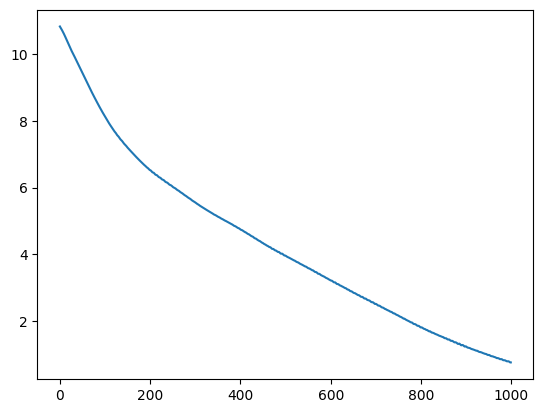

In [13]:
plt.plot(losses)

Save model

In [20]:
torch.save(transformer.state_dict(), "transformer.bin")

## Generate text

In [14]:
def greedy(model, input_ids, max_new_tokens=32):
    # idx is (B, T) array of indices in the current context
    for _ in range(max_new_tokens):
        # get the predictions
        logits = model(input_ids)
        # focus only on the last time step
        logits = logits[:, -1] # becomes (B, C)
        # greedy decoding
        idx_next = logits.argmax(1).unsqueeze(0)
        # append sampled index to the running sequence
        input_ids = torch.cat((input_ids, idx_next), dim=1) # (B, T+1)
    return input_ids

In [16]:
## load previously saved model
#transformer.load_state_dict(torch.load("transformer.bin"))

In [30]:
texts[0]

" Following the death of Finan , bishop of Lindisfarne , Alhfrith of Deira , in collusion with Wilfred of York , Agilbert of Wessex and others , were determined to persuade Oswiu to rule in favour of the Roman rite of Christianity within the kingdoms over which he had imperium . The case was debated in Oswiu 's presence at the Synod of Whitby in 664 , with Colmán , Hild and Cedd defending the Celtic rite and the tradition inherited from Aidan , and Wilifred speaking for the Roman position . The Roman cause prevailed and the former division of ecclesiastical authorities was set aside . Those who could not accept it , including Colmán , departed elsewhere . \n"

When overfitting on one single batch, the model simply memorizes training data

In [37]:
prompt = " Following"


In [38]:
input_ids = tokenizer([prompt], return_tensors='pt', padding=True, truncation=True, max_length=seq_len)['input_ids'].cuda()
output = greedy(transformer, input_ids)

tokenizer.batch_decode(output)

[' Following the death of Finan, bishop of Lindisfarne, Alhfrith of Deira, in collusion with Wilfred of York, Agilbert']

It gets a bit better when you train on the 10,000 examples for 20,000 steps, but that roughly takes one hour on a labtop GPU

[' Following his home of Work Records, Shawn Conductwings days on January 2013 and Valan and 17 August 18 & 200, 1990. \n\n\n\n\n']

In [65]:
prompt = " The"

[" The first first known for the United States, Texas Texas, was announced by a member of 1829 and the United States's Championship. In February 2007, the"]

# Bonus: Visualize Attentions

Now that we understand the basic mechanisms of attention, we can check the activated attention patterns in a pretrained BERT model (Devlin et al. 2018). Recall that BERT is an encoder-based transformer model which is based on a stack of self-attention blocks.

In [ ]:
from transformers import BertTokenizer, BertModel
from bertviz import head_view

# Define a sample input text
text = "I will go for a run and will jump into a lake."

# Instantiate the BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Tokenize the input text
tokens = tokenizer.tokenize(text)

# Convert tokens to token IDs
token_ids = tokenizer.convert_tokens_to_ids(tokens)

# Create attention mask
attention_mask = [1] * len(token_ids)

# Convert token IDs and attention mask to tensors
input_ids = torch.tensor([token_ids])
attention_mask = torch.tensor([attention_mask])

# Generate the transformer output
outputs = model(input_ids, attention_mask=attention_mask, output_attentions=True)

# Extract attentions and check the shape
outputs.attentions[0].shape

As you can see, we extracted an attention from the first layer. The first dimension is the bach, the second one is the number of heads used in the first layer, and the last two dimensions are the sequence length. Given that this was a self attention block the last two numbers are equal.

We can now use a method from the [bertviz library](https://github.com/jessevig/bertviz) and plot all the heads.

You'll see a dropdown menu that allows you the select a layer of the model (GPT-2 has 12). You'll then see a color for every head used in that layer (GPT-2 has 12 head per layer). By default all heads are shown, click on a color to activate/disactivate that head. It can help starting by activating only one head and checking the learned relation learn by that self attentino head. By hovering over each word you can see the attention weigths that linked that words to all the others.

**Question** Do you notice any interesting (linguistic) pattern?

In [ ]:
head_view(outputs.attentions, tokens=tokens)